<a href="https://colab.research.google.com/github/dkalenov/Logistic-Company-Hypothesis-Testing/blob/main/Courier_company_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hypothesis Testing

The logistics company managers conducted a series of A/B tests, all data was saved in 4 files.

The objective is to analyze the data and test hypotheses.

#Task 1

The logistics company conducted an A/B test, selecting delivery time by couriers as the metric. The control group retained the previous app navigation interface, while the test group implemented a new feature allowing the combination of multiple transportation modes. Delivery time results in minutes for the test and control groups are provided in CSV files: "times_couriers_control.csv" and "times_couriers_test.csv". Verify the manager's hypothesis that the app's new feature has reduced delivery time.

### 1) Hypotheses


Hypotheses:

H0: μ0 = μ1 - the mean delivery time in the test group is equal to the time in the control group.

H1: μ0 > μ1 - the mean delivery time in the test group is less than in the control group.

### 2) Data Preprocessing

In [ ]:
from scipy import stats as st
import pandas as pd

# Data Extraction
control_group = pd.read_csv("https://raw.githubusercontent.com/dkalenov/Courier-company-analysis.-New-feature-s-A-B-test-Sales-Staff/main/times_couriers_control.csv")
control_group

,Unnamed: 0,time
0,0,10.88
1,1,14.11
2,2,8.51
3,3,6.43
4,4,24.32
...,...,...
467,467,16.86
468,468,19.50
469,469,8.15
470,470,7.80


In [ ]:
test_group = pd.read_csv("https://raw.githubusercontent.com/dkalenov/Courier-company-analysis.-New-feature-s-A-B-test-Sales-Staff/main/times_couriers_test.csv")
test_group

,Unnamed: 0,time
0,0,12.69
1,1,13.51
2,2,16.19
3,3,9.77
4,4,8.81
...,...,...
467,467,14.10
468,468,23.18
469,469,9.98
470,470,15.26


In [ ]:
print('Data for the control group')
# dataset size
print(f'Dataset size: {control_group.shape}\n')
# general dataset information
print('General dataset information:')
control_group.info()
print()
# check for duplicates
print(f'Duplicates found: {control_group.duplicated().sum()}')
# check for missing values
print(f'Missing values found: {control_group.isnull().sum()}')
print()
print('*' * 50)
print()

print('Data for the test group')
# dataset size
print(f'Dataset size: {test_group.shape}\n')
# general dataset information
print('General dataset information:')
test_group.info()
print()
# check for duplicates
print(f'Duplicates found: {test_group.duplicated().sum()}')
# check for missing values
print(f'Missing values found: {test_group.isnull().sum()}')

Data for the control group
Dataset size: (472, 2)

General dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 472 entries, 0 to 471
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  472 non-null    int64  
 1   time        472 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 7.5 KB

Duplicates found: 0
Missing values found: Unnamed: 0    0
time          0
dtype: int64

**************************************************

Data for the test group
Dataset size: (472, 2)

General dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 472 entries, 0 to 471
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  472 non-null    int64  
 1   time        472 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 7.5 KB

Duplicates found: 0
Missing values found: Unnamed: 0    0
time   

In [ ]:
# Rename 'Unnamed: 0'
control_group = control_group.rename(columns={'Unnamed: 0': 'id'})
test_group = test_group.rename(columns={'Unnamed: 0': 'id'})

In [ ]:
control_group.head(3)

,id,time
0,0,10.88
1,1,14.11
2,2,8.51


In [ ]:
test_group.head(3)

,id,time
0,0,12.69
1,1,13.51
2,2,16.19


In [ ]:
control_group.describe()

,id,time
count,472.000000,472.000000
mean,235.500000,14.220763
std,136.398925,5.772502
min,0.000000,2.300000
25%,117.750000,9.647500
50%,235.500000,13.735000
75%,353.250000,18.900000
max,471.000000,29.040000


In [ ]:
test_group.describe()

,id,time
count,472.000000,472.000000
mean,235.500000,15.390508
std,136.398925,5.686440
min,0.000000,3.530000
25%,117.750000,10.520000
50%,235.500000,15.215000
75%,353.250000,20.342500
max,471.000000,26.460000


<Axes: ylabel='time'>

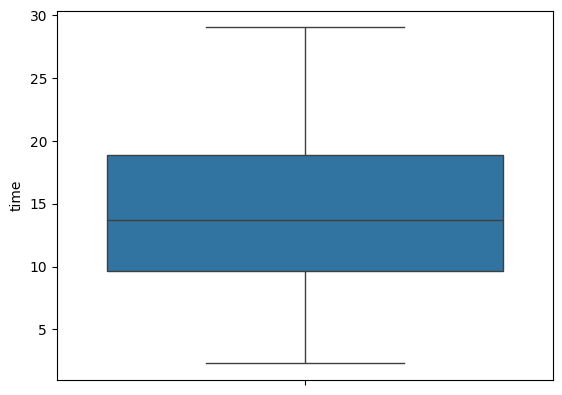

In [ ]:
# Check for outliers
import seaborn as sns
# Outliers in the control group
sns.boxplot(data=control_group['time'])

<Axes: ylabel='time'>

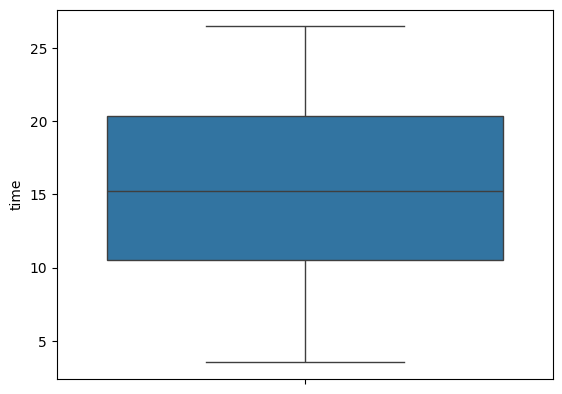

In [ ]:
# Check for outliers
import seaborn as sns
# Outliers in test group
sns.boxplot(data=test_group['time'])


Brief summary: Both datasets have no duplicates, correct data types, and no missing values. There are no outliers in either dataset. The mean delivery time in the control group is lower than in the test group; the standard deviation in the control group is 5.77, while in the test group it is 5.68.

### 3) Data Visualization

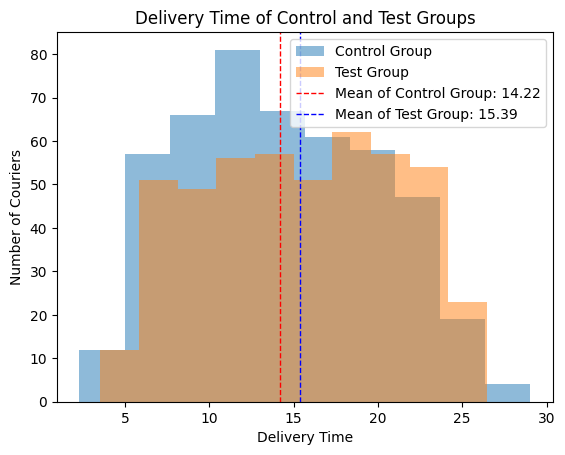

In [ ]:
import matplotlib.pyplot as plt

# Histogram plotting
plt.hist(control_group['time'], bins=10, alpha=0.5, label='Control Group')
plt.hist(test_group['time'], bins=10, alpha=0.5, label='Test Group')

# Calculating and displaying the mean values of the samples
mean_control = control_group['time'].mean()
mean_test = test_group['time'].mean()
plt.axvline(x=mean_control, color='red', linestyle='dashed', linewidth=1, label='Mean of Control Group: {:.2f}'.format(mean_control))
plt.axvline(x=mean_test, color='blue', linestyle='dashed', linewidth=1, label='Mean of Test Group: {:.2f}'.format(mean_test))

# Graph settings
plt.xlabel('Delivery Time')
plt.ylabel('Number of Couriers')
plt.title('Delivery Time of Control and Test Groups')
plt.legend()

# Displaying the graph
plt.show()

### 4) Hypothesis Testing

In [ ]:
from scipy import stats as st
alpha = 0.05  # level of significance


results = st.ttest_ind(test_group['time'], control_group['time'],
                       alternative="less")  # delivery time in the test group is less than in the control group

print('p-value:', results.pvalue)
print('t-statistic:', results.statistic)

if results.pvalue < alpha:
    print('Reject the null hypothesis. The introduction of the transportation combination option did not reduce delivery time.')
else:
    print('Fail to reject the null hypothesis. There is not enough evidence to claim that the introduced option reduced delivery time.')

p-value: 0.9991180560045553
t-statistic: 3.1363225525939744
Fail to reject the null hypothesis. There is not enough evidence to claim that the introduced option reduced delivery time.


# Task 2

From May 1, frequently ordering customers were provided with
a discount valid for all orders until the end of the calendar month, if the client has already made four orders this month (that is, starting from the fifth order).

The clients_orders.csv file provides information about the number of orders that the same clients placed in April and May. Test the hypothesis that customers began to place more orders after the introduction of a discount.

### 1) Hypotheses

HYPOTHESES:

H0: μ0 = μ1 - after the introduction of the discount, the number of orders did not change

H1: μ0 < μ1 - customers began to place more orders after the introduction of the discount

### 2) Data Preprocessing

In [1]:
from scipy import stats as st
import pandas as pd

# Data Extraction
orders = pd.read_csv("https://raw.githubusercontent.com/dkalenov/Courier-company-analysis.-New-feature-s-A-B-test-Sales-Staff/main/clients_orders.csv")

In [2]:
print('Data for the control group')
# dataset size
print(f'Dataset size: {orders.shape}\n')
# general information about the dataset
print('General dataset information:')
orders.info()
print()
# checking for obvious duplicates
print(f'Number of duplicates found: {orders.duplicated().sum()}')
# checking for missing values
print(f'Number of missing values found: {orders.isnull().sum()}')

Data for the control group
Dataset size: (74, 3)

General dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74 entries, 0 to 73
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   Unnamed: 0    74 non-null     int64
 1   orders_april  74 non-null     int64
 2   orders_may    74 non-null     int64
dtypes: int64(3)
memory usage: 1.9 KB

Number of duplicates found: 0
Number of missing values found: Unnamed: 0      0
orders_april    0
orders_may      0
dtype: int64


In [3]:
orders = orders.rename(columns={'Unnamed: 0': 'id'})

In [4]:
orders.head()

,id,orders_april,orders_may
0,0,28,33
1,1,20,18
2,2,22,28
3,3,29,21
4,4,23,27


In [5]:
orders.describe()

,id,orders_april,orders_may
count,74.000000,74.000000,74.000000
mean,36.500000,21.851351,24.108108
std,21.505813,5.413536,5.653384
min,0.000000,12.000000,14.000000
25%,18.250000,18.000000,19.250000
50%,36.500000,22.000000,23.500000
75%,54.750000,26.750000,28.000000
max,73.000000,31.000000,35.000000


<Axes: ylabel='orders_april'>

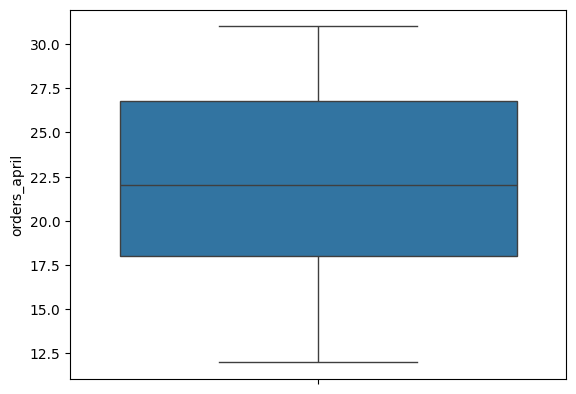

In [6]:
# Check for outliers
import seaborn as sns


# Outliers in April
sns.boxplot(data=orders['orders_april'])

<Axes: ylabel='orders_may'>

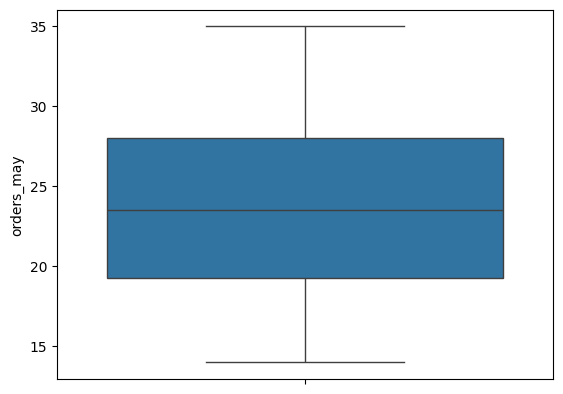

In [7]:
import seaborn as sns

# Outliers in May
sns.boxplot(data=orders['orders_may'])

Brief conclusion: there are no duplicates in both datasets, everything is fine with data types, no gaps, no outliers.

The average number of orders in April is 21.85, in May - 24.10; standard deviation in April - 5.41, in May - 5.65

### 3) Data Visualization

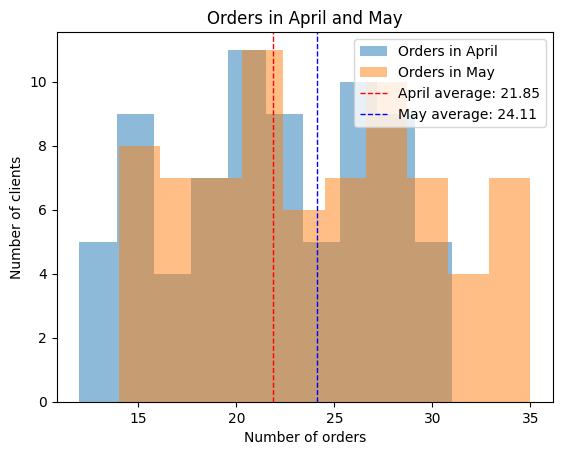

In [23]:
import matplotlib.pyplot as plt

# Constructing histograms
plt.hist(orders['orders_april'], bins=10, alpha=0.5, label='Orders in April')
plt.hist(orders['orders_may'], bins=10, alpha=0.5, label='Orders in May')

# Calculate and display sample averages
mean_control = orders['orders_april'].mean()
mean_test = orders['orders_may'].mean()
plt.axvline(x=mean_control, color='red', linestyle='dashed', linewidth=1, label='April average: {:.2f}'.format(mean_control))
plt.axvline(x=mean_test, color='blue', linestyle='dashed', linewidth=1, label='May average: {:.2f}'.format(mean_test))

plt.xlabel('Number of orders')
plt.ylabel('Number of clients')
plt.title('Orders in April and May')
plt.legend()

plt.show()

### 4) Hypothesis Testing

In [8]:
# Hypothesis Testing

alpha = 0.05  # level of statistical significance

# Performing paired t-test
results = st.ttest_rel(orders['orders_april'], orders['orders_may'],
                       alternative="less") # the number of orders increased after the discount

print('p-value:', results.pvalue)
print('t-statistic:', results.statistic)

if results.pvalue < alpha:
    print('Reject the null hypothesis. Customers started to make more orders after the discount')
else:
    print('Failed to reject the null hypothesis. The change in orders is not statistically significant')

p-value: 0.00538333571008088
t-statistic: -2.6173307841882494
Reject the null hypothesis. Customers started to make more orders after the discount


# Task 3

The file couriers_education.csv contains anonymized information about the company's couriers: education and the number of years of work in the company (experience).

Test the hypothesis that length of service in a company depends on the level of education.

The **education** variable takes the following values:

- NS - no school - no school leaving certificate

- MS - middle school - completed 9 grades of school

- S - school - secondary education: completed high school

- SSE - secondary special education - secondary specialized education (vocational school /
college)

- HE - higher education - higher education




The **experience** variable takes the following values:

- 0-1 - up to one year of work in the company

- 1-3 - from one to three years of work

- 3-5 - from three to five years of work

- 5- - from five years of work

### 1) Hypotheses

HYPOTHESES:

H0: Work experience in the company does not depend on the level of education of couriers.

H1: The length of service in the company depends on the level of education of couriers.

### 2) Data Preprocessing

In [9]:
from scipy import stats as st
import pandas as pd

# Data Extraction
education = pd.read_csv("https://raw.githubusercontent.com/dkalenov/Courier-company-analysis.-New-feature-s-A-B-test-Sales-Staff/main/couriers_education.csv")

In [10]:
# Dataset size
print(f'Dataset size: {education.shape}\n')

# General information about the dataset
print(f'General dataset information:')
education.info()
print()

# Checking for obvious duplicates
print(f'Duplicates found: {education.duplicated().sum()}')

# Checking for missing values
print(f'Missing values found: {education.isnull().sum()}')

# Displaying the first few rows of the dataset
education.head()

Dataset size: (467, 3)

General dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 467 entries, 0 to 466
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  467 non-null    int64 
 1   education   467 non-null    object
 2   experience  467 non-null    object
dtypes: int64(1), object(2)
memory usage: 11.1+ KB

Duplicates found: 0
Missing values found: Unnamed: 0    0
education     0
experience    0
dtype: int64


,Unnamed: 0,education,experience
0,0,MS,0-1
1,1,S,0-1
2,2,S,0-1
3,3,S,0-1
4,4,HE,3-5


In [11]:
education = education.rename(columns={'Unnamed: 0': 'id'})

In [12]:
education.head()

,id,education,experience
0,0,MS,0-1
1,1,S,0-1
2,2,S,0-1
3,3,S,0-1
4,4,HE,3-5


### 3) Data Visualization

In [13]:
# contingency table between education and work experience
contingency_table = pd.crosstab(education['education'], education['experience'])

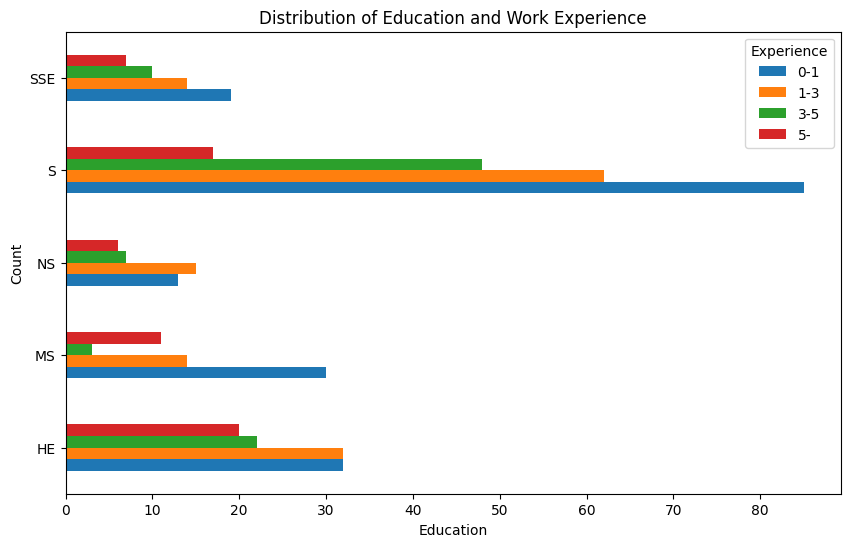

In [14]:
import matplotlib.pyplot as plt

contingency_table.plot(kind='barh', figsize=(10, 6))

plt.title('Distribution of Education and Work Experience')
plt.xlabel('Education')
plt.ylabel('Count')
plt.legend(title='Experience')

plt.show()

### 4) Hypothesis Testing

In [15]:
# Performing the chi-square test
chi2, p_value, dof, expected = st.chi2_contingency(contingency_table)

# Outputting the results
print("Chi-square value:", chi2)
print("p-value:", p_value)
if p_value < 0.05:
    print("Reject the null hypothesis. Work experience depends on the level of education.")
else:
    print("Failed to reject the null hypothesis.")

Chi-square value: 22.507947679669225
p-value: 0.032205915366036585
Reject the null hypothesis. Work experience depends on the level of education.


# Task 4

Construct 95% confidence intervals from the samples from Task 1 for the average delivery times for couriers using and not using the new multimodal option in the app.

### 1) Solution via formula

**Confidence interval = mean + - margin of error**

Formula:

**Confidence interval = x̅ ± Za/2 * σ/√(n)**, where
- n — sample size
- x̅ — average value, sum(x)/n - mean

  **Za/2 * σ/√(n)** estimated standard errors

- σ — standard deviation - standard deveation, (sum(x - x̅)**2 / n) ** 0.5
- Za/2 = confidence coefficient - or this is also a critical value (where a = confidence level confidence level). For a = 0.95, Za/2 = 0.475, in the [table of Z-scores](http://statsoft.ru/home/textbook/modules/sttable.html#t) the corresponding value for 0.475 = 1.96 (at the intersection rows 1.9 and columns 0.06).

Therefore, the formula for the 95% confidence interval = mean +- 1.96 * (σ/√(n))

In [16]:
from scipy import stats as st
import pandas as pd
import numpy as np

# Data Extraction
control_group = pd.read_csv("https://raw.githubusercontent.com/dkalenov/Courier-company-analysis.-New-feature-s-A-B-test-Sales-Staff/main/times_couriers_control.csv")
test_group = pd.read_csv("https://raw.githubusercontent.com/dkalenov/Courier-company-analysis.-New-feature-s-A-B-test-Sales-Staff/main/times_couriers_test.csv")

In [17]:
control_group['time'].describe()

count    472.000000
mean      14.220763
std        5.772502
min        2.300000
25%        9.647500
50%       13.735000
75%       18.900000
max       29.040000
Name: time, dtype: float64

In [18]:
# confidence interval for control group
z = 1.96
n = len(control_group['time'])
mean = sum(control_group['time']) / n
std = ((sum([(i - mean) ** 2 for i in control_group['time']])) / n) ** 0.5

# left confidence interval
left_ci = mean - z * std / n**0.5
# right confidence interval
right_ci = mean + z * std / n**0.5
print(f'Sample Size: {n}\nMean: {mean}\nStandard Deviation: {std}')
print(f'95% Confidence interval for control group: {left_ci} to {right_ci}')

Sample Size: 472
Mean: 14.220762711864408
Standard Deviation: 5.7663834253456585
95% Confidence interval for control group: 13.700540862457013 to 14.740984561271803


In [19]:
test_group['time'].describe()

count    472.000000
mean      15.390508
std        5.686440
min        3.530000
25%       10.520000
50%       15.215000
75%       20.342500
max       26.460000
Name: time, dtype: float64

In [20]:
# confidence interval for test group
z = 1.96
n = len(test_group['time'])
mean = sum(test_group['time']) / n
std = ((sum([(i - mean) ** 2 for i in test_group['time']])) / n) ** 0.5

# left confidence interval
left_ci = mean - z * std / n**0.5
# right confidence interval
right_ci = mean + z * std / n**0.5
print(f'Sample Size: {n}\nMean: {mean}\nStandard Deviation: {std}')
print(f'95% Confidence interval for control group: {left_ci} to {right_ci}')

Sample Size: 472
Mean: 15.390508474576261
Standard Deviation: 5.680413097811866
95% Confidence interval for control group: 14.878042551108027 to 15.902974398044496


### 2) solution via function

In [22]:
from scipy import stats as st
import pandas as pd
import numpy as np

confidence_level = 0.95

# Loading data
control_group = pd.read_csv("https://raw.githubusercontent.com/dkalenov/Courier-company-analysis.-New-feature-s-A-B-test-Sales-Staff/main/times_couriers_control.csv")
test_group = pd.read_csv("https://raw.githubusercontent.com/dkalenov/Courier-company-analysis.-New-feature-s-A-B-test-Sales-Staff/main/times_couriers_test.csv")

# Calculate the mean and standard deviation for the control group
control_mean = control_group['time'].mean()
control_std = control_group['time'].std()

# Calculate the mean and standard deviation for the test group
test_mean = test_group['time'].mean()
test_std = test_group['time'].std()

# Calculate sample size for each group
control_n = len(control_group)
test_n = len(test_group)

# Calculate confidence intervals for means
control_interval = st.t.interval(confidence_level, control_n, loc=control_mean, scale=control_std / np.sqrt(control_n))
test_interval = st.t.interval(confidence_level, test_n, loc=test_mean, scale=test_std / np.sqrt(test_n))

print("Control group")
print(f'Sample Size: {control_n}\nMean: {control_mean}\nStandard Deviation: {control_std}')
print(f'95% Confidence interval for control group: {control_interval}')
print()
print('*' * 50)
print()
print("Test group")
print(f'Sample Size: {test_n}\nMean: {test_mean}\nStandard Deviation: {test_std}')
print(f'95% Confidence interval for control group: {test_interval}')

Control group
Sample Size: 472
Mean: 14.220762711864404
Standard Deviation: 5.7725016057672445
95% Confidence interval for control group: (13.698659687026103, 14.742865736702706)

**************************************************

Test group
Sample Size: 472
Mean: 15.39050847457627
Standard Deviation: 5.686440063006167
95% Confidence interval for control group: (14.876189421898827, 15.904827527253714)
